# IÐN303G Tæknileg kerfi - Forritunaræfing 9

## Inngangur
Markmiðið með þessari æfingu er að kynnast hönnun PID stýringa.

Gefið er sjálfvirkt stýrikerfi sem má lýsa með eftirfarandi blokkriti.

<div>
<img src="https://github.com/rsaemundsson/idn303_technical_systems/blob/main/automatic_control_system.png?raw=true", width=600>

Til stendur að velja stýringu þannig að fasaöryggið sé $\frac{\pi}{3}$.

1. Veljið gildi á $K$ og $T_D$ fyrir PD stýringu sem uppfyllir kröfur um fasaöryggi.  
2. Veljið gildi á $K$, $T_D$, $T_I$ og $T_F$ fyrir PID stýringu sem uppfyllir kröfur um fasaöryggi.
3. Berið saman stýringarnar með því að bera saman tíðnisvörun lykkjunnar, tímasvörun heildarkerfisins og skekkju í jafnvægi eftir breytingar í óskgildi og þrepatruflanir í kerfinu sem á að stýra ($G_p$). Hvað myndi réttlæta að velja PID stýringuna fram yfir PD stýringuna? Væri ástæða til að velja PI stýringu í stað PID stýringarinnar?

2.2 13.57087908204619 0.6324555320336759 0.4204068132393048


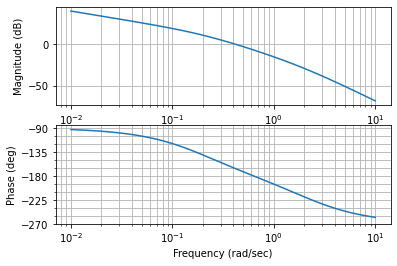

In [2]:
# Hlaða inn þeim forritasöfnum sem þarf að hlaða inn
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Fasaöryggi í gráðum

phase_margin_criteria = 60
phase_margin_PI = 60 + 0.06 * 180

# Yfirfærsluföll

G_p=ct.tf(2,[5, 1, 0])
G_a=ct.tf(1,[1,2])

G_K=ct.series(G_a,G_p)

# Stöðugleikagreining

mag,phase,omega=ct.bode(G_K, dB=True)

gm, pm, wcg_init, wcp = ct.margin(G_K)
print(gm,pm,wcg_init,wcp)


0.3162 s + 0.2
--------------
      1


   0.6325 s + 0.4
--------------------
5 s^3 + 11 s^2 + 2 s

inf 60.91205398011846 nan 0.1604342068098245


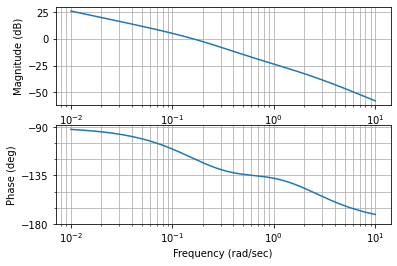

In [5]:
#PD stýring
T_D = 1.0 / wcg_init
K = 0.2
G_PD = K * ct.tf([T_D, 1],[1])
print(G_PD)

G_K_PD=ct.series(G_PD, G_a, G_p)
print(G_K_PD)

# Stöðugleikagreining - Breyti K þar til fasaöryggi er rétt

mag,phase,omega=ct.bode(G_K_PD, dB=True)

gm, pm, wcg, wcp_PD = ct.margin(G_K_PD)
print(gm,pm,wcg,wcp_PD)


1.581 s + 1
------------
0.4743 s + 1


           0.2625 s + 0.166
---------------------------------------
2.372 s^4 + 10.22 s^3 + 11.95 s^2 + 2 s

70.8
90.65852854840061 71.41093651138658 1.5888775940390263 0.07782203798115493

5.333 s + 0.083
---------------
    64.25 s


         16.86 s^2 + 10.93 s + 0.166
---------------------------------------------
152.4 s^5 + 656.5 s^4 + 767.7 s^3 + 128.5 s^2

88.42990755889848 60.00078086508259 1.5678609094627216 0.07914994477031378


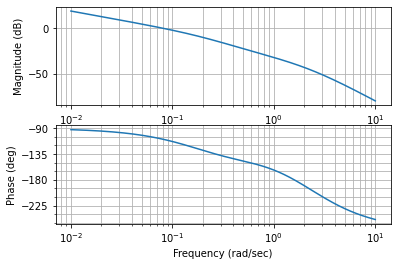

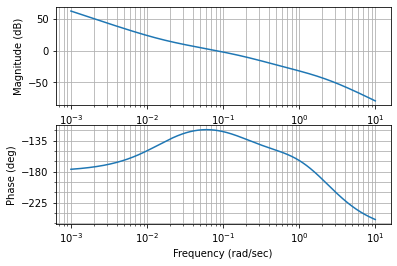

In [6]:
#PID stýring
T_D = 1.0 / wcg_init
T_F = 0.3 * T_D
K = 0.083

G_PID_PD = ct.tf([T_D, 1],[T_F, 1])
print(G_PID_PD)

G_K_1 = K * ct.series(G_PID_PD, G_a, G_p)
print(G_K_1)

# Stöðugleikagreining - Breyti K þar til fasaöryggi (phase_margin_PI) passar
plt.figure()
mag,phase,omega=ct.bode(G_K_1, dB=True)

gm, pm, wcg, wcp_PI = ct.margin(G_K_1)
print(phase_margin_PI)
print(gm,pm,wcg,wcp_PI)

T_I = 1.0 / (0.2 * wcp_PI)
G_PID_PI = K * ct.tf([T_I, 1],[T_I, 0])
print(G_PID_PI)
G_K_PID = ct.series(G_PID_PI, G_PID_PD, G_a, G_p)
print(G_K_PID)

# Stöðugleikagreining - Geng úr skugga um að fasaöryggi sé rétt
plt.figure()
mag,phase,omega=ct.bode(G_K_PID, dB=True)

gm, pm, wcg, wcp_PID = ct.margin(G_K_PID)
print(gm,pm,wcg,wcp_PID)

8.726318581544968 17.68794664434293

                -60.95 s^3 - 250.4 s^2 - 257 s
---------------------------------------------------------------
152.4 s^5 + 656.5 s^4 + 767.7 s^3 + 145.4 s^2 + 10.93 s + 0.166



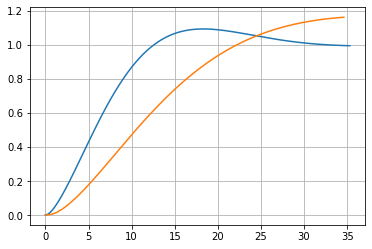

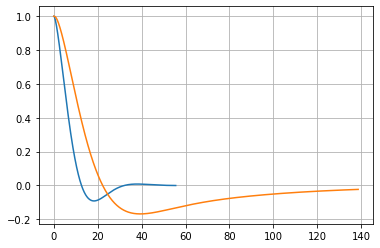

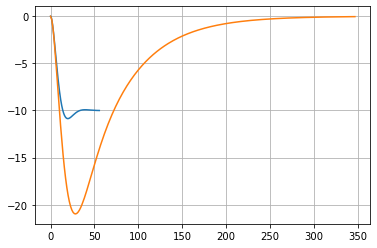

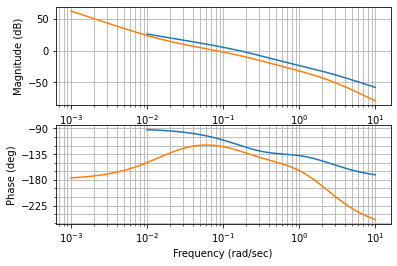

In [7]:
#Samanburður

# Hraði
G_T_PD = ct.feedback(G_K_PD,1)
G_T_PID = ct.feedback(G_K_PID,1)

n_show = 500
[t_PD, y_PD] = ct.step_response(G_T_PD)
plt.plot(t_PD[:n_show], y_PD[:n_show])

[t_PID, y_PID] = ct.step_response(G_T_PID)
plt.plot(t_PID[:n_show], y_PID[:n_show])
plt.grid()

t_r_PD = 1.4 / wcp_PD
t_r_PID = 1.4 / wcp_PID
print(t_r_PD,t_r_PID)

# Skekkja í jafnvægi

# Breyting í óskgildi

G_RE_PD = ct.feedback(1,G_K_PD)
G_RE_PID = ct.feedback(1,G_K_PID)

plt.figure()
n_show = 2000
[t_PD, y_PD] = ct.step_response(G_RE_PD)
plt.plot(t_PD[:n_show], y_PD[:n_show])

[t_PID, y_PID] = ct.step_response(G_RE_PID)
plt.plot(t_PID[:n_show], y_PID[:n_show])
plt.grid()

#Þrepatruflun í V

G_VE_PD = ct.feedback(-G_p,-ct.series(G_PD,G_a))
G_VE_PID = ct.feedback(-G_p,-ct.series(G_PID_PI, G_PID_PD, G_a))

print(G_VE_PID)

plt.figure()
n_show = 2000
[t_PD, y_PD] = ct.step_response(G_VE_PD)
plt.plot(t_PD[:n_show], y_PD[:n_show])

[t_PID, y_PID] = ct.step_response(G_VE_PID)
plt.plot(t_PID[:n_show], y_PID[:n_show])
plt.grid()

#Tíðnisvörun lykkjunar
plt.figure()
mag,phase,omega=ct.bode(G_K_PD, dB=True)
mag,phase,omega=ct.bode(G_K_PID, dB=True)